### PCA


In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [14]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

C:\Users\mdyo_\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mdyo_\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mdyo_\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mdyo_\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mdyo_\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mdyo_\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45936 missing from c

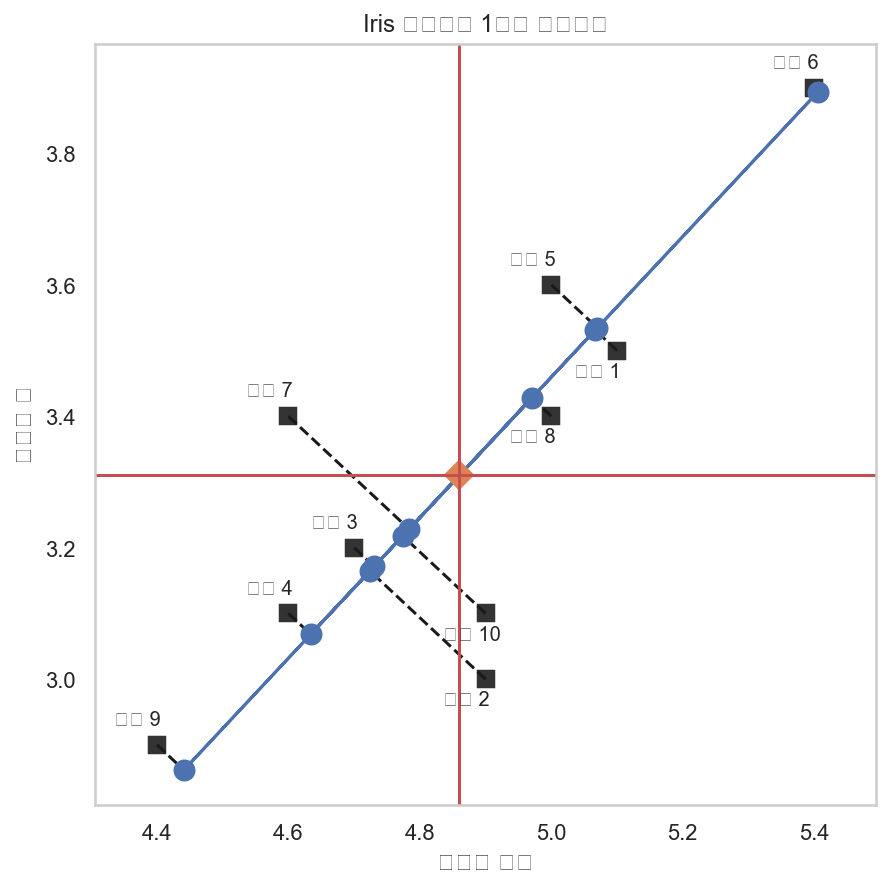

In [15]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

In [16]:
pca1.mean_


array([4.86, 3.31])

In [17]:
pca1.components_
#단위 기저 벡터(주성분,W)

array([[0.68305029, 0.73037134]])

In [19]:
X0 = X- X.mean(axis=0)
X0

array([[ 0.24,  0.19],
       [ 0.04, -0.31],
       [-0.16, -0.11],
       [-0.26, -0.21],
       [ 0.14,  0.29],
       [ 0.54,  0.59],
       [-0.26,  0.09],
       [ 0.14,  0.09],
       [-0.46, -0.41],
       [ 0.04, -0.21]])

In [20]:
U,S,VT= np.linalg.svd(X0)
VT

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [24]:
#1차원이므로 첫번째 오른쪽 특이벡터만 구하기
VT[:,:1]

array([[-0.68305029],
       [-0.73037134]])

In [27]:
##고유분해로 알아내기
XCOV= X0.T @X0
XCOV



array([[0.764, 0.634],
       [0.634, 0.849]])

In [30]:
W,V= np.linalg.eig(XCOV)
print(W)
print(V) #고유벡터의 집합

[0.17107711 1.44192289]
[[-0.73037134 -0.68305029]
 [ 0.68305029 -0.73037134]]


In [31]:
np.argmax(W) #가장 큰 특이값(고유값)의 인덱스

1

In [33]:
V[:,np.argmax(W)] #가장 큰 특이값(고유값)에 대응하는 오른쪽 특이벡터(고유벡터)

array([-0.68305029, -0.73037134])

In [34]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [35]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

In [36]:
X_low

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

In [38]:
pca1.components_
#주성분 W

array([[0.68305029, 0.73037134]])

In [47]:
#7 번째 꽃의 크기
pca1.components_ @ (X[7,:]- pca1.mean_)

array([0.16136046])

In [48]:
# 7 번째 꽃의 크기
X_low[7]

array([0.16136046])

In [50]:
#다시 2차원으로 복귀
pca1.inverse_transform(X_low)[7]

array([4.97021731, 3.42785306])

In [53]:
X[7,:]

array([5. , 3.4])

#### 연습 문제 3.5.1

붓꽃 데이터 중 앞에서 50개의 데이터(setosa 종)에 대해 다음 문제를 풀어라.

(1) 꽃앞의 길이와 꽃잎의 폭을 이용하여 1차원 PCA를 수행하라. 꽃의 크기는 꽃받침 길이와 꽃받침 폭의 어떤 선형조합으로 나타나는가?

(2) 꽃받침 길이와 폭, 꽃잎 길이와 폭, 이 4가지 변수를 모두 사용하여 1차원 PCA를 수행하라. 꽃의 크기는 관측 데이터의 어떤 선형조합으로 나타나는가?

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
N= 50
X= iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=1)
X_low= pca1.fit_transform(X)
X_low

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057],
       [-2.74534286],
       [-2.72871654],
       [-2.28085963],
       [-2.82053775],
       [-2.62614497],
       [-2.88638273],
       [-2.6727558 ],
       [-2.50694709],
       [-2.61275523],
       [-2.78610927],
       [-3.22380374],
       [-2.64475039],
       [-2.38603903],
       [-2.62352788],
       [-2.64829671],
       [-2.19982032],
       [-2.5879864 ],
       [-2.31025622],
       [-2.54370523],
       [-3.21593942],
       [-2.30273318],
       [-2.35575405],
       [-2.50666891],
       [-2.46882007],
       [-2.56231991],
       [-2.63953472],
       [-2.63198939],
       [-2.58739848],
       [-2.4099325 ],
       [-2.64886233],
       [-2.59873675],
       [-2.63692688],
       [-2.86624165],
       [-2.62523805],
       [-2.80068412],
       [-2.98050204],
       [-2.59000631],
       [-2.77010243],
       [-2.84936871],
       [-2.99740655],
       [-2.40561449],
       [-2.20948924],
       [-2

In [6]:
X2=pca1.inverse_transform(X_low)
X2

array([[4.87332632, 3.28420238, 1.45858847, 0.23764012],
       [4.86247892, 3.28673941, 1.4328746 , 0.22688569],
       [4.79929088, 3.30151808, 1.2830867 , 0.16423922],
       [4.85120324, 3.28937661, 1.40614547, 0.21570665],
       [4.85721176, 3.28797132, 1.42038875, 0.22166368],
       [5.01906124, 3.25011732, 1.8040546 , 0.38212597],
       [4.82402881, 3.29573228, 1.34172822, 0.18876513],
       [4.89427975, 3.27930171, 1.50825879, 0.25841396],
       [4.80023332, 3.30129766, 1.28532076, 0.16517358],
       [4.87743522, 3.28324137, 1.46832867, 0.2417138 ],
       [4.93735627, 3.2692268 , 1.61037212, 0.30112127],
       [4.89911863, 3.27816997, 1.51972939, 0.26321136],
       [4.8364708 , 3.29282229, 1.37122209, 0.20110048],
       [4.67829389, 3.32981733, 0.99626209, 0.04427928],
       [4.887556  , 3.28087429, 1.49232008, 0.25174784],
       [4.98105082, 3.25900735, 1.7139505 , 0.34444132],
       [4.89522554, 3.27908051, 1.51050079, 0.25935164],
       [4.88627441, 3.28117403,

In [52]:
# #경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [43]:
x=np.linspace(-10,10,50)
y=f(x)

C:\Users\mdyo_\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


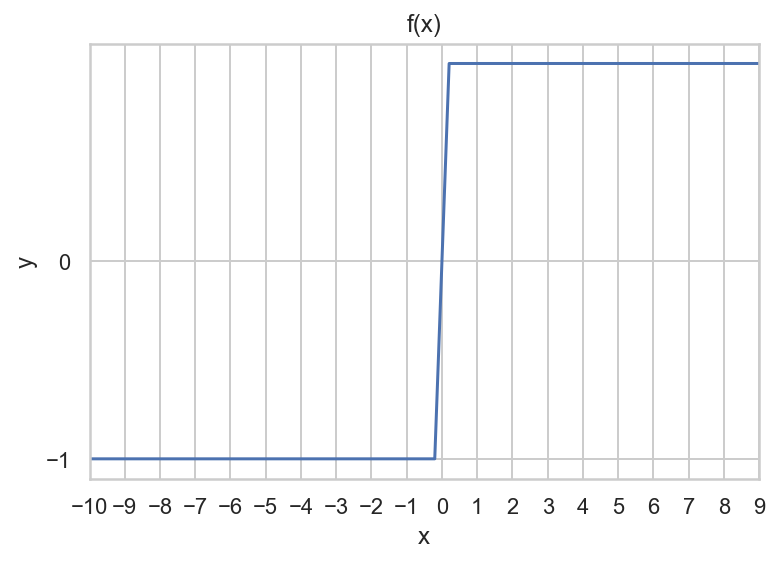

In [44]:
plt.plot(x, y)
plt.xlim(-2, 4)
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(-10, 10))
plt.yticks(np.arange(-1, 1))
plt.show()

In [49]:
# 단위계단함수 정의
def heaviside_step(x):
    if isinstance(x, np.ndarray):
        return np.where(x>= 0,1,0)
    else:
        return 1.0 if x>=0 else 0.0
y= heaviside_step(x)

In [50]:
x=np.linspace(-10,10,100)

C:\Users\mdyo_\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


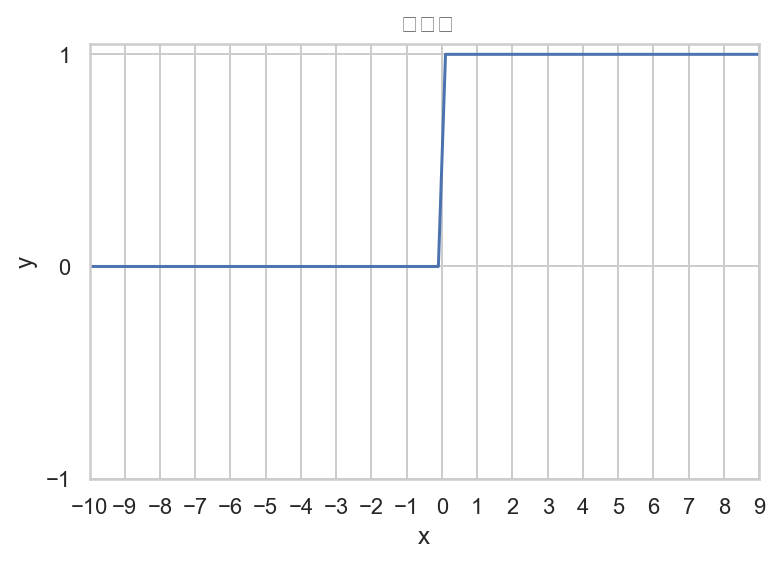

In [51]:
plt.plot(x, y)
plt.xlim(-2, 4)
plt.title(" 그래프")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(-10, 10))
plt.yticks(np.arange(-1, 2))
plt.show()

Font 'default' does not have a glyph for '\ud568' [U+d568], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc218' [U+c218], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc5ed' [U+c5ed], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud568' [U+d568], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc218' [U+c218], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud568' [U+d568], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc218' [U+c218], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc5ed' [U+c5ed], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud568' [U+d568], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc218' [U+c218], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud568' [U+d568], 

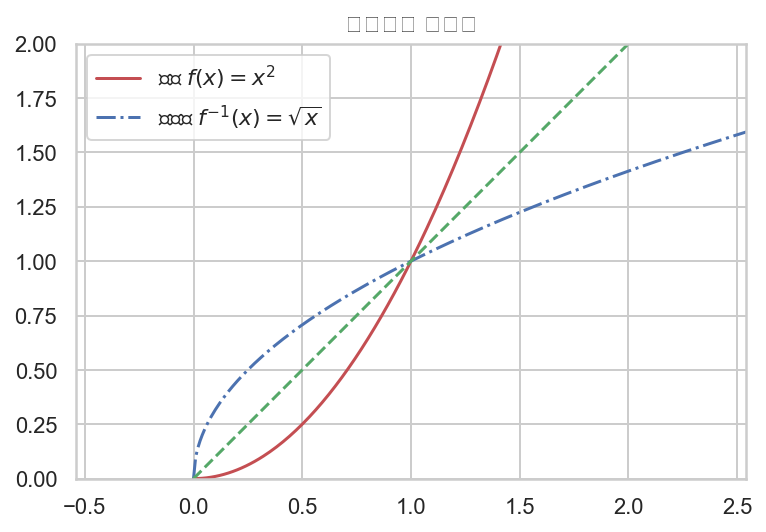

In [53]:
def f1(x):
    return x**2

def f1inv(x):
    return np.sqrt(x)

x = np.linspace(0, 3, 300)
plt.plot(x, f1(x), "r-", label="함수 $f(x) = x^2$")
plt.plot(x, f1inv(x), "b-.", label="역함수 $f^{-1}(x) = \sqrt{x}$")
plt.plot(x, x, "g--")
plt.axis("equal")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.legend()
plt.title("역함수의 그래프")
plt.show()

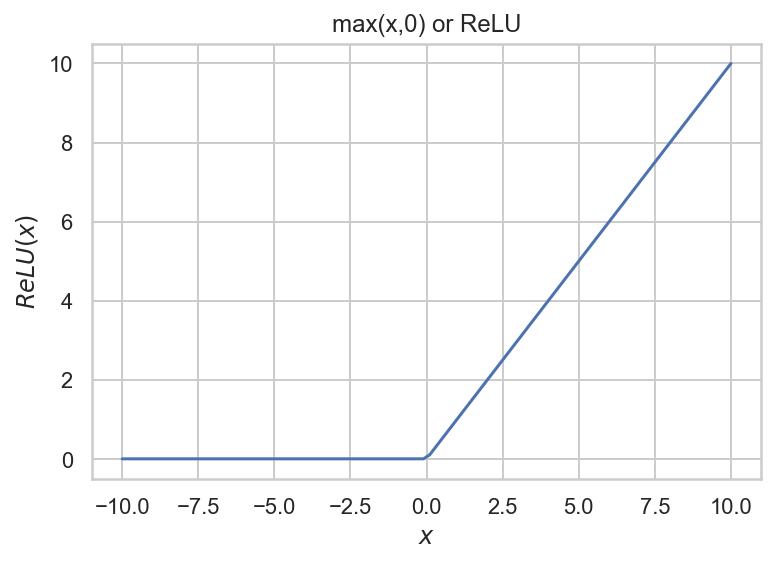

In [59]:
#ReLU 함수
def f(x):
    return np.maximum(x,0)

xx = np.linspace(-10, 10, 100)
plt.plot(xx, f(xx))
plt.title("max(x,0) or ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.show()

#### 소프트플러스 함수
- 함수로 0을 인수로 갖는 최대함수와 비슷하지만 0근처에서 부드럽게 꺾인다는 것이 장점
$$ 
\begin{align}
\zeta(x) = \log( 1 + \exp(x))
\tag{4.1.34}
\end{align}
$$

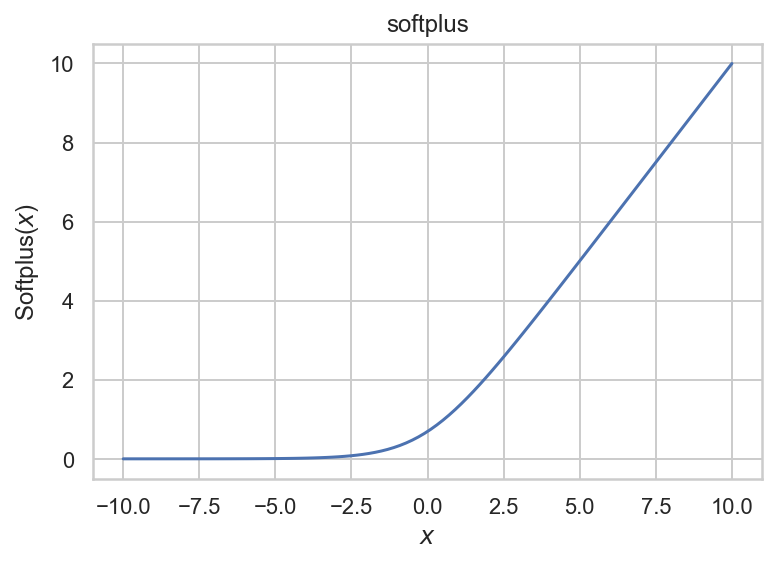

In [60]:
def softplus(x):
    return np.log(1 + np.exp(x))

xx = np.linspace(-10, 10, 100)
plt.plot(xx, softplus(xx))
plt.title("softplus")
plt.xlabel("$x$")
plt.ylabel("Softplus($x$)")
plt.show()

In [62]:
###소프트 맥스 함수

def softmax(x,w): #x는 1차원배열, w는 가중치
    e=np.exp(w*x)
    return np.exp(w*x)/e.sum()

X=[2,1,0.5]
W=np.array([1,1,1])
y= softmax(X,W)
y

array([0.62853172, 0.2312239 , 0.14024438])

In [63]:
np.sum(y)

1.0

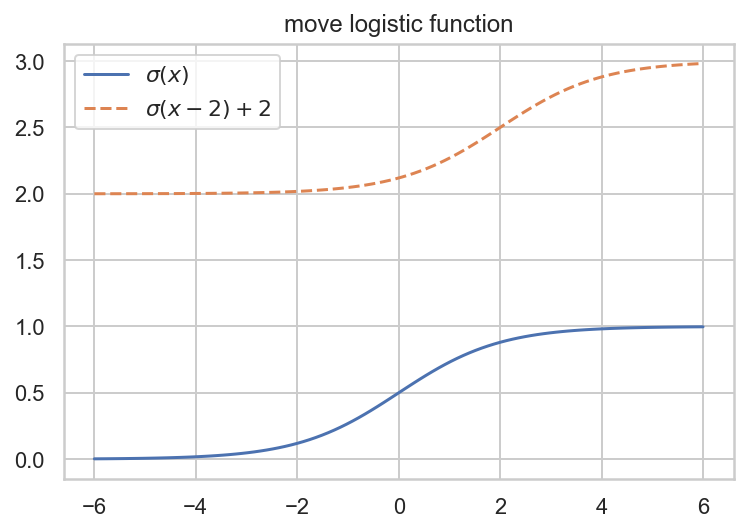

In [67]:
###함수의 이동
def logistic(x):
    return 1 / (1 + np.exp(-x))

xx = np.linspace(-6, 6, 100)
plt.plot(xx, logistic(xx), label="$\sigma(x)$", ls="-")
plt.plot(xx, logistic(xx-2)+2, label="$\sigma(x-2)+2$", ls="--")
plt.legend()
plt.title("move logistic function")
plt.show()

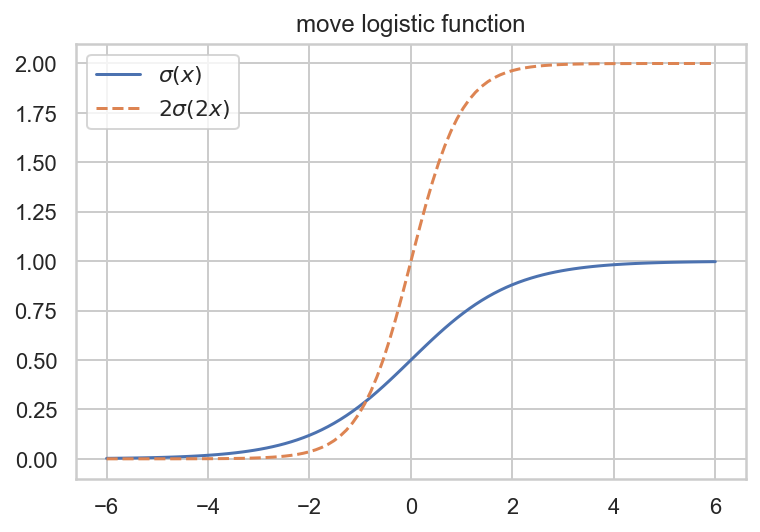

In [70]:
###함수의 스케일링
def logistic(x):
    return 1 / (1 + np.exp(-x))

xx = np.linspace(-6, 6, 100)
plt.plot(xx, logistic(xx), label="$\sigma(x)$", ls="-")
plt.plot(xx, 2*logistic(2*xx), label="$2\sigma(2x)$", ls="--")
plt.legend()
plt.title("move logistic function")
plt.show()